In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
stadiums = pd.read_csv('nfl_stadiums.csv')

In [3]:
spread = pd.read_csv('spreadspoke_scores.csv')

In [4]:
teams = pd.read_csv('nfl_teams.csv')

# A little about betting

## What is a point spread? Why does it usually have a .5 at the end? 

### The point spread is the expected final score difference between two teams. It is represented as both a negative and positive number; if the spread is 3 points, you'll see that as both -3 and +3. The team that is the favorite to win gets the minus-number (-3); the underdog gets the plus-number (+3). 

### But the actual number itself, ignoring the plus-minus sign, will always be the same for both teams, because, again, that's the expected margin of victory. 

### If Team A is a 3-point favorite over Team B, Team A has to win by more than 3 points to win the bet, or "cover." Team B can win the game outright or lose by one or two points (but no more than that) and they "cover." 

https://www.foxsports.com/stories/nfl/point-spread-over-under

# Why is this important? 

### An estimated 45.2 million Americans plan to wager on the NFL season in some form, up 36% from last year, according to research from the American Gaming Association. At least 

### 12 billion will be bet on the NFL this season, according to sports betting market tracker PlayUSA.

https://www.cnbc.com/2021/09/09/more-americans-will-wager-on-the-nfl-as-the-league-embraces-betting.html

# The Quesion Being Posed Here 

### What can you expect your monthly income to be if you bet the spread of games each week 

## Stadiums 

### I need absolutely nothing from this particular CSV there is also a ton of nan factors and outdated stadiums I won't be utilizing this in my model but it takes 12.5 KB so I will be hashtagging out of this. 

In [5]:
#stadiums.info()

## Spread 

### I will  be dropping schedule date as I don't think the day has a correlation on spread 
### I will be dropping schedule season prior to 2012 as I want to do a 10 year tenure  
### Schedule week does not have a direct correlation to the over or under of the spread
### I don't want schedule_playoff to play a part in over under spread either 

### Team_Home will be kept 
### Score_Home will be kept 
### Score away will be kept 
### Team_Away will be kept 
### Team Favorite Id will be kept 
### Spread_favorite Target Variable
### Over_under_line dropped for now 
### Stadium Dropped 
### Stadium neutal dropped 
### All Weather ccolumns will be dropped 
### schedule_dropped below 2013. completed.

In [6]:
spread
spread.drop(index = spread[spread['schedule_season'] <= 2012].index, inplace = True)
spread.drop(columns = ['stadium','weather_temperature','weather_wind_mph','schedule_week','weather_humidity','weather_detail','schedule_playoff','schedule_date','stadium_neutral'], inplace = True)

In [7]:
spread['team_home'].str.strip()

10809          Denver Broncos
10810           Buffalo Bills
10811       Carolina Panthers
10812           Chicago Bears
10813        Cleveland Browns
                 ...         
13227      Kansas City Chiefs
13228    Tampa Bay Buccaneers
13229      Kansas City Chiefs
13230        Los Angeles Rams
13231        Los Angeles Rams
Name: team_home, Length: 2423, dtype: object

## The function below adds the "final_spread column to the spread dataframe

In [8]:
def finalspread(home, away):
    return home - away

In [9]:
spread['final_spread'] = finalspread(spread['score_home'], spread['score_away'])
spread

,schedule_season,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,final_spread
10809,2013,Denver Broncos,49.0,27.0,Baltimore Ravens,DEN,-7.5,49.5,22.0
10810,2013,Buffalo Bills,21.0,23.0,New England Patriots,NE,-10.5,51.5,-2.0
10811,2013,Carolina Panthers,7.0,12.0,Seattle Seahawks,SEA,-3.5,45,-5.0
10812,2013,Chicago Bears,24.0,21.0,Cincinnati Bengals,CHI,-3.0,42,3.0
10813,2013,Cleveland Browns,10.0,23.0,Miami Dolphins,CLE,-2.5,40.5,-13.0
...,...,...,...,...,...,...,...,...,...
13227,2021,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,6.0
13228,2021,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,-3.0
13229,2021,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,-3.0
13230,2021,Los Angeles Rams,20.0,17.0,San Francisco 49ers,LAR,-3.5,46.0,3.0


C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='spread_favorite'>

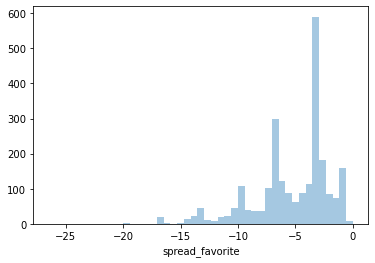

In [10]:
sns.distplot(spread.spread_favorite, 
             kde=False)

## Teams 

### I will be keeping team_division as divisiional games actually have a significant dilema on spread. 

In [11]:
teams

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Phoenix Cardinals,Cardinals,ARI,CRD,NFC,NaN,NFC,NFC East
2,St. Louis Cardinals,Cardinals,ARI,ARI,NFC,NaN,NFC,NFC East
3,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
4,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
5,Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East
6,Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West
7,Chicago Bears,Bears,CHI,CHI,NFC,NFC North,NFC,NFC Central
8,Cincinnati Bengals,Bengals,CIN,CIN,AFC,AFC North,AFC,AFC Central
9,Cleveland Browns,Browns,CLE,CLE,AFC,AFC North,AFC,AFC Central


In [12]:
teams.drop(columns = ['team_name_short','team_id_pfr','team_conference','team_conference_pre2002','team_division_pre2002'], inplace = True)

In [13]:
teams

,team_name,team_id,team_division
0,Arizona Cardinals,ARI,NFC West
1,Phoenix Cardinals,ARI,NaN
2,St. Louis Cardinals,ARI,NaN
3,Atlanta Falcons,ATL,NFC South
4,Baltimore Ravens,BAL,AFC North
5,Buffalo Bills,BUF,AFC East
6,Carolina Panthers,CAR,NFC South
7,Chicago Bears,CHI,NFC North
8,Cincinnati Bengals,CIN,AFC North
9,Cleveland Browns,CLE,AFC North


In [14]:
#I have to drop the teams who haven't been teams within the last 10 years of the NFL 

teams.drop(index=teams[teams['team_name'] == 'Tennessee Oilerss'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'Houston Oilers'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'Los Angeles Raiders'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'Tennessee Oilers'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'Phoenix Cardinals'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'St. Louis Cardinals'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'Boston Patriots'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'Baltimore Colts'].index, inplace = True)
teams.reset_index(drop=True, inplace=True)
teams['team_name'].str.strip()
teams

,team_name,team_id,team_division
0,Arizona Cardinals,ARI,NFC West
1,Atlanta Falcons,ATL,NFC South
2,Baltimore Ravens,BAL,AFC North
3,Buffalo Bills,BUF,AFC East
4,Carolina Panthers,CAR,NFC South
5,Chicago Bears,CHI,NFC North
6,Cincinnati Bengals,CIN,AFC North
7,Cleveland Browns,CLE,AFC North
8,Dallas Cowboys,DAL,NFC East
9,Denver Broncos,DEN,AFC West


In [15]:
divisions = {
    'NFC_West': ['Arizona Cardinals', 'Seattle Seahawks', 'Los Angeles Rams', 'San Francisco 49ers', 'St. Louis Rams'],
    'NFC_South':['Tampa Bay Buccaneers', 'New Orleans Saints','Carolina Panthers','Atlanta Falcons'],
    'NFC_East': ['Washington Football Team','Washington Redskins','New York Giants','Philadelphia Eagles','Dallas Cowboys'],
    'NFC_North': ['Chicago Bears','Detroit Lions','Green Bay Packers','Minnesota Vikings'],
    'AFC_South': ['Tennessee Titans','Jacksonville Jaguars','Indianapolis Colts','Houston Texans'],
    'AFC_North': ['Pittsburgh Steelers','Cincinnati Bengals','Cleveland Browns','Baltimore Ravens'],
    'AFC_West': ['Las Vegas Raiders','Oakland Raiders','San Diego Chargers','Los Angeles Chargers','Denver Broncos','Kansas City Chiefs'],
    'AFC_East': ['New England Patriots','Miami Dolphins','Buffalo Bills','New York Jets']}

In [16]:
team = 'Kansas City Chiefs'
for key in divisions:
    if team in divisions[key]:
        print(key)


AFC_West


In [17]:
def get_division(team):
    for key in divisions:
        if team in divisions[key]:
            return key



In [18]:
a, b = 'a', 'b'

print(a)
print(b)

a
b


In [19]:
for num, val in enumerate(spread['team_home']):
    print(num, val)

0 Denver Broncos
1 Buffalo Bills
2 Carolina Panthers
3 Chicago Bears
4 Cleveland Browns
5 Dallas Cowboys
6 Detroit Lions
7 Indianapolis Colts
8 Jacksonville Jaguars
9 New Orleans Saints
10 New York Jets
11 Pittsburgh Steelers
12 San Francisco 49ers
13 St. Louis Rams
14 San Diego Chargers
15 Washington Redskins
16 New England Patriots
17 Arizona Cardinals
18 Atlanta Falcons
19 Baltimore Ravens
20 Buffalo Bills
21 Chicago Bears
22 Green Bay Packers
23 Houston Texans
24 Indianapolis Colts
25 Kansas City Chiefs
26 New York Giants
27 Oakland Raiders
28 Philadelphia Eagles
29 Seattle Seahawks
30 Tampa Bay Buccaneers
31 Cincinnati Bengals
32 Philadelphia Eagles
33 Baltimore Ravens
34 Carolina Panthers
35 Cincinnati Bengals
36 Dallas Cowboys
37 Miami Dolphins
38 Minnesota Vikings
39 New England Patriots
40 New Orleans Saints
41 New York Jets
42 Pittsburgh Steelers
43 San Francisco 49ers
44 Seattle Seahawks
45 Tennessee Titans
46 Washington Redskins
47 Denver Broncos
48 St. Louis Rams
49 Atlant

394 Miami Dolphins
395 Minnesota Vikings
396 New England Patriots
397 Pittsburgh Steelers
398 San Francisco 49ers
399 Seattle Seahawks
400 New York Giants
401 Cincinnati Bengals
402 Arizona Cardinals
403 Baltimore Ravens
404 Buffalo Bills
405 Detroit Lions
406 Green Bay Packers
407 Jacksonville Jaguars
408 New Orleans Saints
409 New York Jets
410 Oakland Raiders
411 Seattle Seahawks
412 Tampa Bay Buccaneers
413 Philadelphia Eagles
414 Miami Dolphins
415 Arizona Cardinals
416 Carolina Panthers
417 Chicago Bears
418 Cleveland Browns
419 Green Bay Packers
420 Indianapolis Colts
421 Kansas City Chiefs
422 New Orleans Saints
423 New York Giants
424 San Diego Chargers
425 St. Louis Rams
426 Washington Redskins
427 Tennessee Titans
428 Oakland Raiders
429 Atlanta Falcons
430 Chicago Bears
431 Denver Broncos
432 Houston Texans
433 Indianapolis Colts
434 Minnesota Vikings
435 New England Patriots
436 New York Giants
437 Philadelphia Eagles
438 San Diego Chargers
439 San Francisco 49ers
440 Seat

893 Green Bay Packers
894 Arizona Cardinals
895 Atlanta Falcons
896 Cincinnati Bengals
897 Detroit Lions
898 Jacksonville Jaguars
899 Kansas City Chiefs
900 Los Angeles Rams
901 Miami Dolphins
902 New York Jets
903 Philadelphia Eagles
904 Pittsburgh Steelers
905 San Francisco 49ers
906 Tennessee Titans
907 Denver Broncos
908 Tennessee Titans
909 Atlanta Falcons
910 Buffalo Bills
911 Carolina Panthers
912 Cincinnati Bengals
913 Cleveland Browns
914 Dallas Cowboys
915 Denver Broncos
916 Houston Texans
917 Indianapolis Colts
918 New Orleans Saints
919 Tampa Bay Buccaneers
920 Chicago Bears
921 Tampa Bay Buccaneers
922 Baltimore Ravens
923 Cleveland Browns
924 Green Bay Packers
925 Kansas City Chiefs
926 Los Angeles Rams
927 Miami Dolphins
928 Minnesota Vikings
929 New York Giants
930 Oakland Raiders
931 San Diego Chargers
932 San Francisco 49ers
933 Seattle Seahawks
934 Baltimore Ravens
935 Arizona Cardinals
936 Carolina Panthers
937 Jacksonville Jaguars
938 New England Patriots
939 New O

1393 New York Giants
1394 Oakland Raiders
1395 Pittsburgh Steelers
1396 Tennessee Titans
1397 Denver Broncos
1398 New England Patriots
1399 Buffalo Bills
1400 Carolina Panthers
1401 Cincinnati Bengals
1402 Cleveland Browns
1403 Detroit Lions
1404 Houston Texans
1405 Kansas City Chiefs
1406 Los Angeles Chargers
1407 New York Jets
1408 Philadelphia Eagles
1409 Pittsburgh Steelers
1410 San Francisco 49ers
1411 Seattle Seahawks
1412 New Orleans Saints
1413 New York Giants
1414 Atlanta Falcons
1415 Cincinnati Bengals
1416 Cleveland Browns
1417 Dallas Cowboys
1418 Denver Broncos
1419 Houston Texans
1420 Miami Dolphins
1421 Minnesota Vikings
1422 New England Patriots
1423 New York Jets
1424 Oakland Raiders
1425 Tennessee Titans
1426 Washington Redskins
1427 Green Bay Packers
1428 Arizona Cardinals
1429 Baltimore Ravens
1430 Chicago Bears
1431 Indianapolis Colts
1432 Jacksonville Jaguars
1433 Kansas City Chiefs
1434 Los Angeles Chargers
1435 Miami Dolphins
1436 New York Jets
1437 Philadelphia 

1892 Los Angeles Chargers
1893 Miami Dolphins
1894 New York Jets
1895 Philadelphia Eagles
1896 Pittsburgh Steelers
1897 Seattle Seahawks
1898 Tampa Bay Buccaneers
1899 Tennessee Titans
1900 Las Vegas Raiders
1901 Jacksonville Jaguars
1902 Arizona Cardinals
1903 Atlanta Falcons
1904 Buffalo Bills
1905 Cleveland Browns
1906 Denver Broncos
1907 Indianapolis Colts
1908 Los Angeles Chargers
1909 Minnesota Vikings
1910 New England Patriots
1911 New Orleans Saints
1912 New York Giants
1913 Philadelphia Eagles
1914 Pittsburgh Steelers
1915 Seattle Seahawks
1916 Baltimore Ravens
1917 New York Jets
1918 Carolina Panthers
1919 Chicago Bears
1920 Cincinnati Bengals
1921 Dallas Cowboys
1922 Detroit Lions
1923 Houston Texans
1924 Las Vegas Raiders
1925 Los Angeles Rams
1926 Miami Dolphins
1927 San Francisco 49ers
1928 Tampa Bay Buccaneers
1929 Washington Football Team
1930 Green Bay Packers
1931 Kansas City Chiefs
1932 Chicago Bears
1933 Atlanta Falcons
1934 Baltimore Ravens
1935 Cleveland Browns
19

2392 Washington Football Team
2393 Pittsburgh Steelers
2394 Denver Broncos
2395 Philadelphia Eagles
2396 Arizona Cardinals
2397 Atlanta Falcons
2398 Baltimore Ravens
2399 Buffalo Bills
2400 Cleveland Browns
2401 Detroit Lions
2402 Houston Texans
2403 Jacksonville Jaguars
2404 Las Vegas Raiders
2405 Los Angeles Rams
2406 Miami Dolphins
2407 Minnesota Vikings
2408 New York Giants
2409 Tampa Bay Buccaneers
2410 Buffalo Bills
2411 Cincinnati Bengals
2412 Dallas Cowboys
2413 Kansas City Chiefs
2414 Tampa Bay Buccaneers
2415 Los Angeles Rams
2416 Green Bay Packers
2417 Tennessee Titans
2418 Kansas City Chiefs
2419 Tampa Bay Buccaneers
2420 Kansas City Chiefs
2421 Los Angeles Rams
2422 Los Angeles Rams


In [20]:
division_l = []
for value, row in enumerate(spread['team_home']):
    #print(value,row)
    division_l.append(get_division(spread['team_home'].iloc[value]))
    
spread['home_division'] = division_l

In [21]:
spread.head(5)

,schedule_season,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,final_spread,home_division
10809,2013,Denver Broncos,49.0,27.0,Baltimore Ravens,DEN,-7.5,49.5,22.0,AFC_West
10810,2013,Buffalo Bills,21.0,23.0,New England Patriots,NE,-10.5,51.5,-2.0,AFC_East
10811,2013,Carolina Panthers,7.0,12.0,Seattle Seahawks,SEA,-3.5,45,-5.0,NFC_South
10812,2013,Chicago Bears,24.0,21.0,Cincinnati Bengals,CHI,-3.0,42,3.0,NFC_North
10813,2013,Cleveland Browns,10.0,23.0,Miami Dolphins,CLE,-2.5,40.5,-13.0,AFC_North


In [22]:
# We are trying to decide whether or not to choose the favortied team for the spread. 
# Favorite team = True/False 
# What division the team is in and whether they won or lost last game would help decide what to favor. 
#New column "won Last game"/True or false manually entering.. 
#a new dataframe that tells you 1/0 if team won or lost. from the previous season. team name and won or loss.
#home favorite = true/false (teamfavoredd to win is home or not home!)

## I want to add individual column of conference to the spread and increase the weight of these games... 

In [23]:
X = spread.drop('spread_favorite', axis=1)
y = spread['spread_favorite']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)


In [25]:
spread.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2423 entries, 10809 to 13231
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   schedule_season   2423 non-null   int64  
 1   team_home         2423 non-null   object 
 2   score_home        2422 non-null   float64
 3   score_away        2422 non-null   float64
 4   team_away         2423 non-null   object 
 5   team_favorite_id  2423 non-null   object 
 6   spread_favorite   2423 non-null   float64
 7   over_under_line   2423 non-null   object 
 8   final_spread      2422 non-null   float64
 9   home_division     2423 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 208.2+ KB


C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='team_favorite_id', ylabel='count'>

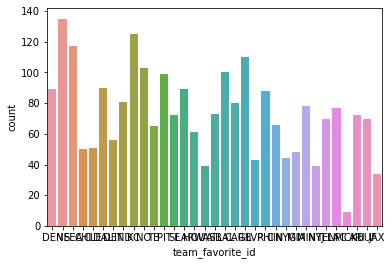

In [26]:
sns.countplot(spread['team_favorite_id'])

In [27]:
!pwd

/c/Users/metropolitanparkapts/phase_5
